<a href="https://colab.research.google.com/github/gusmaomarcos/alura/blob/main/ML_sklearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

In [ ]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
a_renomear = {'unfinished':'nao_finalizado','expected_hours':'horas_esperadas', 'price':'preço'}
dados = dados.rename(columns=a_renomear)

In [ ]:
troca = {0:1, 1:0}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preço,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [ ]:
dados.tail()

,nao_finalizado,horas_esperadas,preço,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


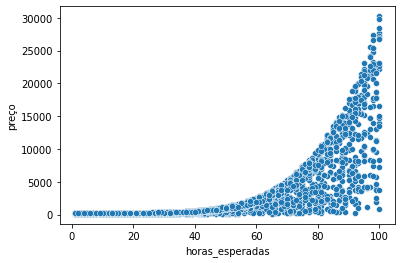

In [ ]:
import seaborn as sns
sns.scatterplot(data=dados, x='horas_esperadas', y='preço')

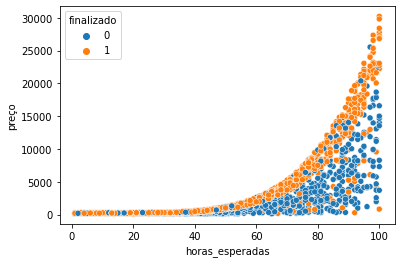

In [ ]:
sns.scatterplot(data=dados, x='horas_esperadas', y='preço', hue='finalizado')

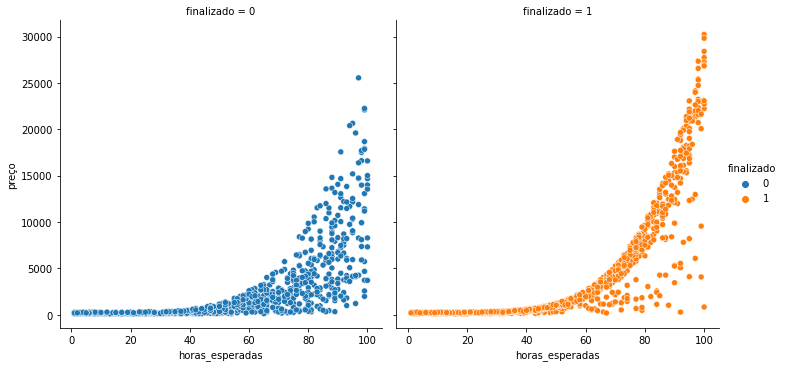

In [ ]:
sns.relplot(data=dados, x='horas_esperadas', y='preço', col='finalizado', hue='finalizado')

In [ ]:
x = dados[['horas_esperadas', 'preço']]
y = dados['finalizado']

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 5
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, random_state = SEED, stratify=y)


modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))
print('A acurácia foi %.2f%%' % (taxa_de_acerto*100))


Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi 48.33%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import numpy as np
previsoes_do_guilherme = np.ones(540)

In [ ]:
taxa_de_acerto = accuracy_score(teste_y, previsoes_do_guilherme)

#print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))
print('A acurácia de baseline foi %.2f%%' % (taxa_de_acerto*100))

A acurácia de baseline foi 52.59%


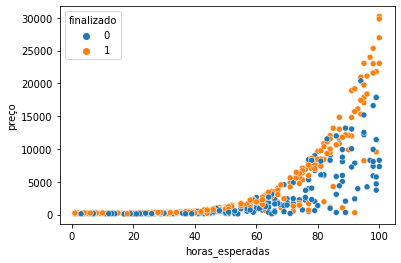

In [ ]:
sns.scatterplot(data=teste_x, x='horas_esperadas', y='preço', hue=teste_y)

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preço.min()
y_max = teste_x.preço.max()
print(x_min,x_max, y_min, y_max)

1 100 100 30223


In [ ]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

In [ ]:
xx.ravel()[:110]

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01,  1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,
        8.92,  9.91])

In [ ]:
pontos = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
z = modelo.predict(pontos)
z

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
z.shape

(10000,)

In [ ]:
xx.shape

(100, 100)

In [ ]:
z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

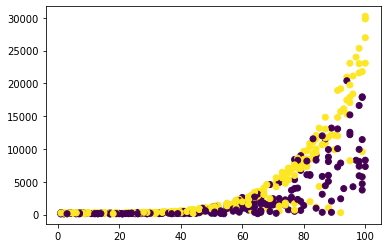

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y)

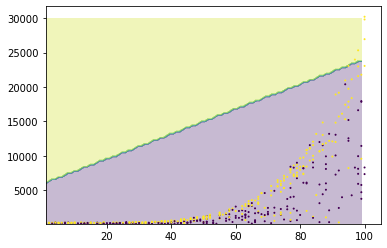

In [ ]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y, s=1)

In [ ]:
dados.head()

,nao_finalizado,horas_esperadas,preço,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify=y)


modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))
print('A acurácia foi %.2f%%' % (taxa_de_acerto*100))


Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi 55.19%


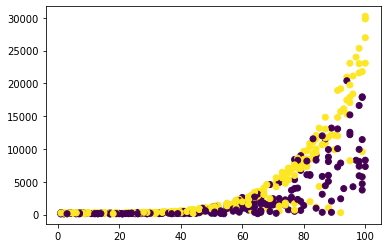

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preço.min()
y_max = teste_x.preço.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y)

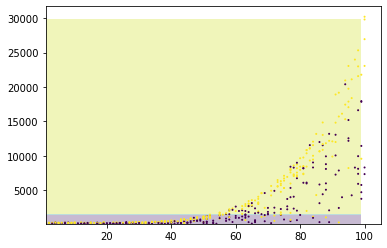

In [ ]:

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y, s=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))
print('A acurácia foi %.2f%%' % (taxa_de_acerto*100))


Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi 66.85%


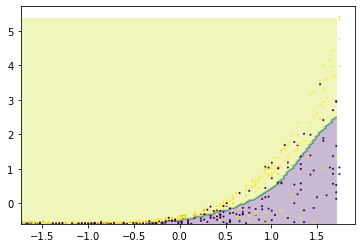

In [ ]:
data_x = teste_x[:, 0]
data_y = teste_x[:,1]
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)


plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)